# Séance 7 - postier chinois

In [1]:
import networkx as nx
import numpy as np

# Create a connected graph with 12 nodes
G = nx.erdos_renyi_graph(
    12, 0.3
)  # Using a random graph for simplicity, adjust probability for connectivity

# Ensure the graph is connected, regenerate if not
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(12, 0.3)

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Convert to a dense numpy array for easier viewing
adj_matrix_dense = adj_matrix.todense()

print("Adjacency Matrix:")
display(adj_matrix_dense)

Adjacency Matrix:


array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

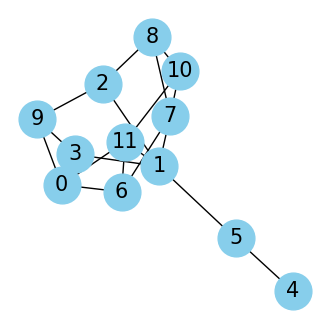

In [2]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=700,
    edge_color="k",
    linewidths=1,
    font_size=15,
    ax=ax,
)

# Display the plot
plt.show()

In [3]:
def degre_noeuds(adj_matrix_dense):
    return adj_matrix_dense.sum(axis=1)


degre_noeuds(adj_matrix_dense)

array([4, 5, 3, 3, 1, 2, 3, 4, 3, 3, 3, 4])

In [4]:
def tous_noeuds_degre_impair_sauf_deux(adj_matrix_dense):
    deg = degre_noeuds(adj_matrix_dense)
    impairs = (deg % 2).sum()
    return bool(impairs <= 2)


tous_noeuds_degre_impair_sauf_deux(adj_matrix_dense)

False

In [5]:
def plus_court_chemin(adj_matrix, debut, fin):
    distance = np.array([np.inf for i in range(len(adj_matrix))])
    predecessors = np.array([-1 for i in range(len(adj_matrix))])
    distance[debut] = 0
    for t in range(len(adj_matrix)):
        for i in range(len(adj_matrix)):
            for j in range(len(adj_matrix)):
                d = distance[i] + adj_matrix[i, j]
                if adj_matrix[i, j] != 0 and distance[j] > d:
                    distance[j] = d
                    predecessors[j] = i
    chemin = []
    while fin != -1:
        chemin.append(int(fin))
        fin = predecessors[fin]
    return distance[fin], chemin[::-1]


plus_court_chemin(adj_matrix_dense, 0, 1)

(np.float64(1.0), [0, 3, 1])

In [6]:
def appariement_approche(adj_matrix):
    degre = degre_noeuds(adj_matrix)
    impair = np.arange(degre.shape[0])[degre % 2 == 1]
    paires = []
    for i in impair:
        for j in impair:
            if i <= j:
                continue
            paires.append((i, j, plus_court_chemin(adj_matrix, i, j)[0]))
    paires.sort()
    appariement = []
    selectionne = set()
    for i, j, d in paires:
        if i not in selectionne and j not in selectionne:
            selectionne.add(i)
            selectionne.add(j)
            appariement.append((i, j))
    return appariement


appariement = appariement_approche(adj_matrix_dense)
appariement

[(np.int64(2), np.int64(1)),
 (np.int64(4), np.int64(3)),
 (np.int64(8), np.int64(6)),
 (np.int64(10), np.int64(9))]

In [7]:
def ajout_arc(adj_matrix):
    copie = adj_matrix.copy()
    appariement = appariement_approche(adj_matrix_dense)
    for i, j in appariement:
        chemin = plus_court_chemin(adj_matrix, i, j)[1]
        for k in range(len(chemin) - 1):
            copie[chemin[k], chemin[k + 1]] += 1
            copie[chemin[k + 1], chemin[k]] += 1
    return copie


matrice_paire = ajout_arc(adj_matrix_dense)
matrice_paire

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2],
       [0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0],
       [2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2],
       [2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0]])

In [8]:
degre_noeuds(matrice_paire)

array([6, 8, 4, 4, 2, 4, 4, 6, 4, 4, 4, 6])

In [9]:
def chemin_passant_par_tous_les_arcs(matrice):
    """
    Retourne un chemin passant par tous les arcs d'un graphe non orienté,
    représenté par une matrice d'adjacence.
    Retourne None si le graphe n'est pas eulérien.
    """
    # Conversion matrice -> liste d'adjacence
    n = len(matrice)
    graphe = {}
    for i in range(n):
        for j in range(i + 1, n):
            if matrice[i][j] > 0:
                if i not in graphe:
                    graphe[i] = []
                if j not in graphe:
                    graphe[j] = []
                graphe[i].append(j)
                graphe[j].append(i)

    # Vérifie si le graphe est eulérien
    def est_eulerien(g):
        degres = [0] * n
        for u in g:
            degres[u] = len(g[u])
        degres_impairs = [u for u in range(n) if degres[u] % 2 != 0]
        if len(degres_impairs) == 0 or len(degres_impairs) == 2:
            return True, degres_impairs
        return False, degres_impairs

    # Algorithme de Hierholzer
    def hierholzer(g):
        stack = []
        chemin = []
        sommet_courant = 0
        stack.append(sommet_courant)

        while stack:
            u = stack[-1]
            if g[u]:
                v = g[u].pop()
                g[v].remove(u)  # Supprime l'arc dans les deux sens
                stack.append(v)
            else:
                chemin.append(stack.pop())
        return chemin[::-1]

    # Copie du graphe pour ne pas le modifier
    g = {}
    for u in graphe:
        g[u] = graphe[u].copy()

    chemin = hierholzer(g)
    return chemin


chemin_passant_par_tous_les_arcs(matrice_paire)

[0, 11, 10, 8, 7, 6, 11, 1, 3, 9, 0, 3, 6, 2, 1, 8, 5, 4, 7, 10]